#Student Name: Ash Hoskins,#S559245 <br />
#Course: CSIS 44-609 - Data Analytics Fundamentals <br />
#Professor Denise Case <br />
#Domain: Geospatial Data Module 6 Project Date: 2/20/2023<br />

Reference Link for USGS Data used in this program: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php for the Live Version https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv<br />
Brief Description: This program reads in csv data from the Monthly Earthquake hazard program results and displays all detectable seizmic activity throughout the world for the last 30 days. <br />
<br />Task 1 Requirements:
1. Use Statistics mean, median, mode, std dev, variance
2. built-in functions min, max, len, count of records, number of columns
3. Get Data into a list
4. Use filter, map and list comprehensions to clean and transform data
5. use pandas
6. use matplotlib
7. Strive to tell a story

In [57]:
#Importing of necessary libraries for the program.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [58]:
#Place csv data into a dataframe. Requirement #5 on Task 1
df = pd.read_csv('MonthEQ.csv')

In [59]:
#Quick way of finding meaningful statistics of a dataframe Requirement #1 on Task 1
df.describe()

,latitude,longitude,depth,mag
count,10517.000000,10517.000000,10517.000000,10517.000000
mean,42.524390,-116.387831,25.056893,1.620490
std,18.532749,67.211486,52.859903,1.284953
min,-59.407800,-179.968900,-3.500000,-1.230000
25%,35.509333,-152.810500,2.910000,0.800000
50%,38.838165,-122.819000,8.400000,1.320000
75%,58.251333,-116.750167,23.440000,2.060000
max,84.881800,179.984000,639.011000,7.800000


In [60]:
#Displays relevent information about the built in functions of the data while providing relevent geospatial information. Requirement #2 on Task 1
print("Earthquakes are measured on a logarithmic scale based on seismic signals, a negative result means it can't be felt by humans")
print()
zed = (df.loc[df['mag'] == df['mag'].max()])
print("The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of: ", df['mag'].max())
print("Which is located approximately: ", zed.iat[0,5])
print()
zed = (df.loc[df['mag'] == df['mag'].min()])
print("The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of: ", df['mag'].min())
print("Which is located approximately: ", zed.iat[0,5])
print()
print("Within the last 30 days there are currently: ", len(df.index), "recorded seizmic activities worldwide")
print()
col = df.columns
print("Although unrelevent data has been removed from the csv there exists: ", len(col), " number of columns")


Earthquakes are measured on a logarithmic scale based on seismic signals, a negative result means it can't be felt by humans

The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of:  7.8
Which is located approximately:  26 km ENE of Nurdağı, Turkey

The Largest Magnitude Earthquake recorded in the last 30 days was at a mag of:  -1.23
Which is located approximately:  60 km ENE of Pedro Bay, Alaska

Within the last 30 days there are currently:  10517 recorded seizmic activities worldwide

Although unrelevent data has been removed from the csv there exists:  6  number of columns


#This is a histogram  from the USGS data showing all the seizmic acitivty in the last 30 days in the world. Tremors that are displayed to the left of the red line cannot be felt by humans.

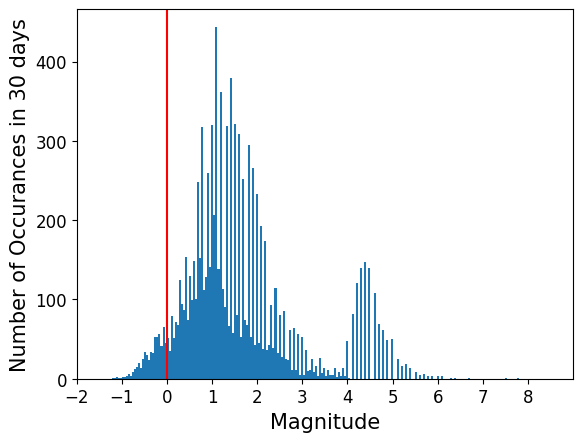

In [93]:
#Use matplot lib to display histogram of relevent data Requirement #6 Task 1
df['mag'].hist(bins = 200, grid = False, xlabelsize= 12, ylabelsize= 12)
plt.xlabel("Magnitude", fontsize = 15)
plt.ylabel("Number of Occurances in 30 days", fontsize = 15)
plt.xticks([-2,-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlim(-2, 9)
plt.axvline(0, c = 'red')



In [94]:
#Basemap creation criteria, centralized lat/lon on Atlantic Ocean. Draw Meridians and Paralells, coats lines, countries lines. For loop sets marker size based on magniture from dataframe
#This is created as method to be used for further tasks.  #x, y = worldmap(df["latitude"] ,df["longitude"]) Testing commented out for continuity of magnitude size.
def worldmap(data):
    worldmap = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=10, lon_0=-13)    
    worldmap.drawcoastlines()
    worldmap.drawcountries()
    worldmap.fillcontinents(color = 'gray')
    worldmap.drawmapboundary()
    worldmap.drawmeridians(np.arange(0, 360, 30))
    worldmap.drawparallels(np.arange(-90, 90, 30))
    
# For loop used to set marker size on the Basemap equal to the magnitude of the measurement. 
    for longitude, latitude, mag in zip(data['longitude'], data['latitude'], data['mag']):
        if mag > 5:
            min_marker_size = mag
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'rs', markersize = min_marker_size)
        elif mag < 0:
            min_marker_size = 3
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'bs', markersize = min_marker_size)
        else:
            min_marker_size = mag
            x,y = worldmap(longitude, latitude)
            worldmap.plot(x, y, 'g^', markersize = min_marker_size)

#plt.show(worldmap(df))

